*Luis Antonio Ortega Andrés       
Antonio Coín Castro*

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
import scipy.integrate as integrate
import seaborn as sns

# Algoritmo de aceptación y rechazo (A/R)

## Ejercicio 1

Supongamos la función
$$
f(x)=\sin(2\pi x)^5−2\sin\left(3\cos\left(\frac{x}{\pi}\right)^2\right)^3 +3
$$
y el intervalo $(a,b)=(0,10)$. Estimar el área delimitada por la función $f(x)$  en el intervalo $(a,b)$. Evaluar (gráficamente) la precisión (incertidumbre) de la estimación.

*Nota*: la función original se ha modificado porque no coincidía con la gráfica que se muestra en los apuntes.

In [3]:
def plot_f(f, x):
    plt.title("Gráfica de f")
    plt.plot(x,f(x))
    plt.show()

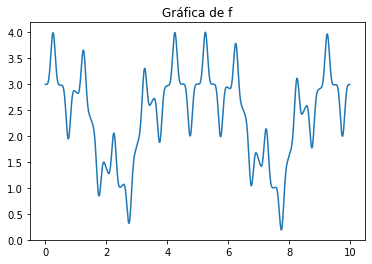

In [11]:
# Mostramos la función
f = lambda x: np.sin(2*np.pi*x)**5 -2*np.sin(3*np.cos(x/np.pi)**2)**3 + 3
x = np.arange(0, 10, 0.01)
plot_f(f,x)

Implementamos el algoritmo de aceptación/rechazo por Monte Carlo.

In [28]:
def mc_ar(f, xlims, ylims, samples = 50000, plot = False, verbose = False):
    x = uniform.rvs(xlims[0], xlims[1] - xlims[0], samples)
    y = uniform.rvs(ylims[0], ylims[1] - ylims[0], samples)
    good = y <= f(x)
    wrong = np.logical_not(good)
    if plot:
        plt.scatter(x[good], y[good], s=1, color="red")
        plt.scatter(x[wrong], y[wrong], s=1, color="blue")
        plt.title(f"Aciertos (rojo) y fallos (azul), nsamples={samples}")
        plt.show()
    area_rect = (xlims[1] - xlims[0])*(ylims[1]- ylims[0])
    mean = np.mean(good)
    area = area_rect*mean
    if verbose:
        print("Resultado integración:", integrate.quad(f, *xlims, limit=100)[0], 
              "\nEstimación A/R:", area)
    return area

Probamos este método de integración con nuestra función $f$ en $[0,10]\times[0,5]$, y vemos que conseguimos una buena estimación.

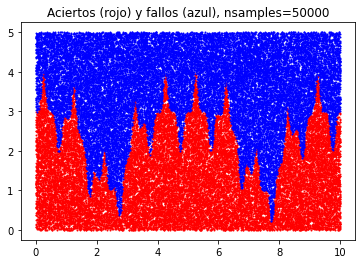

Resultado integración: 23.987186930717478 
Estimación A/R: 23.958


In [36]:
res_ar = mc_ar(f, (0,10), (0,5), samples=50000, plot=True, verbose = True)

Podemos tomar la función que se daba en los apuntes, que toma valores negativos y calcular su area restando su parte positiva a su parte negativa.

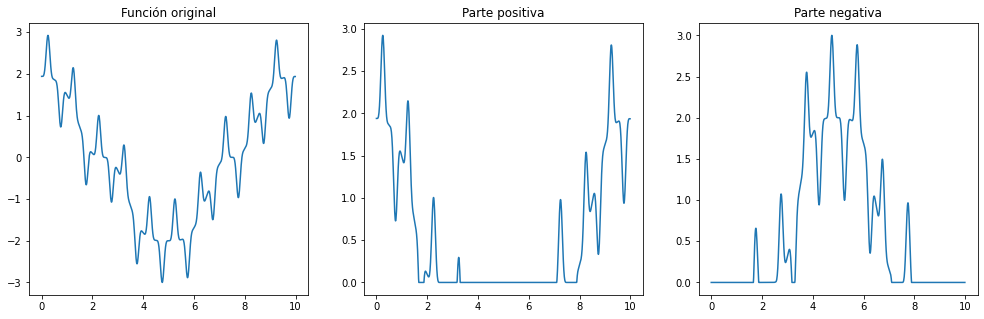

In [37]:
f1 = lambda x: np.sin(2*np.pi*x)**5 -2*np.cos(3*np.cos(x/np.pi)**2)**3
x = np.arange(0, 10, 0.01)
f1_max = lambda x: f1(x).clip(min=0)
f1_min = lambda x: np.abs(f1(x).clip(max=0))
fig, axes = plt.subplots(1,3, figsize=(17,5))
axes[0].plot(x, f1(x))
axes[1].plot(x, f1_max(x))
axes[2].plot(x, f1_min(x))
axes[0].set_title("Función original")
axes[1].set_title("Parte positiva")
axes[2].set_title("Parte negativa")
plt.show()

Parte positiva:


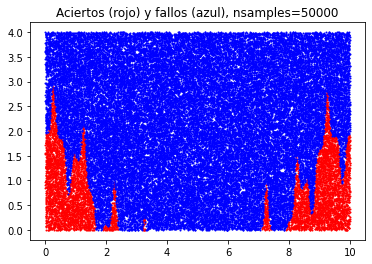

Resultado integración: 5.818992213469915 
Estimación A/R: 5.6672

Parte negativa:


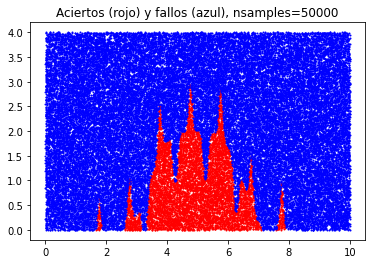

Resultado integración: 6.435577896024718 
Estimación A/R: 6.3832

Resultado integración total: -0.616585682554799 
Estimación total A/R: -0.7160000000000002


In [38]:
print("Parte positiva:")
area_pos = mc_ar(f1_max, (0,10), (0,4), samples=50000, plot=True, verbose = True)
print("\nParte negativa:")
area_neg = mc_ar(f1_min, (0,10), (0,4), samples=50000, plot=True, verbose = True)

print("\nResultado integración total:", integrate.quad(f1, 0,10)[0], 
              "\nEstimación total A/R:", area_pos - area_neg)

Para evaluar gráficamente la precisión del método, repetimos el experimento 1000 veces, primero utilizando 1000 lanzamientos en el método A/R, y después utilizando 10000. Pintamos la densidad y la distribución empírica obtenida, y observamos que se asemeja a una normal.

In [43]:
n1, n2 = 1000, 10000
nrep = 1000
res1 = np.array([mc_ar(f, (0,10), (0, 5), n1) for _ in range(nrep)])
res2 = np.array([mc_ar(f, (0,10), (0, 5), n2) for _ in range(nrep)])

In [40]:
# Función para dibujar las gráficas
def plot_kde_ecdf(x1, x2, labels, value):
    _, axes = plt.subplots(1, 2, figsize=(15,5))
    axes[0].set_title(f"Densidad en {len(x1)} repeticiones con N lanzamientos")
    sns.kdeplot(x1, ax = axes[0], fill = True, label=labels[0])
    sns.kdeplot(x2, ax = axes[0], fill = True, label=labels[1])
    ylims = axes[0].get_ylim()
    axes[0].vlines(value, *ylims, color = "red")
    axes[0].set_ylim(*ylims)
    axes[0].set_xlabel("Área estimada")
    axes[1].set_title("Distribución empírica")
    sns.ecdfplot(x1, ax = axes[1], label=labels[0])
    sns.ecdfplot(x2, ax = axes[1], label=labels[1])
    axes[1].set_xlabel("Área estimada")
    axes[0].legend()
    axes[1].legend()

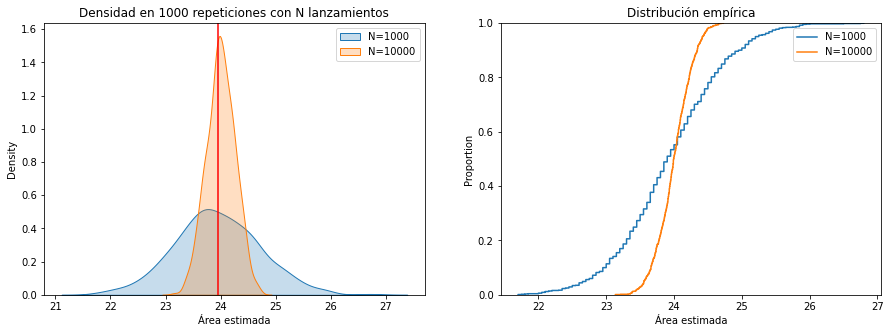

In [44]:
plot_kde_ecdf(res1, res2, [f"N={n1}", f"N={n2}"], res_ar)

# Algoritmo basado en medias

## Ejercicio 2

Calcula la integral
$$
\int_0^1 (1-x^2)^{1/2}\,dx = \frac{\pi}{4}
$$

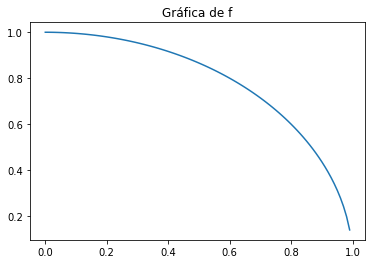

In [45]:
# Mostramos la función
h = lambda x: (1-x**2)**(0.5)
x=np.arange(0,1,0.01)
plot_f(h,x)

Implementamos el algoritmo de Monte Carlo basado en medias.

In [46]:
def mc_means(h, samples = 10000):
    x = uniform.rvs(0, 1, samples)
    return np.mean(h(x))

In [48]:
res_means = mc_means(h)
print("Valor obtenido por MC: ", res_means, "\nValor real: ", np.pi/4)

Valor obtenido por MC:  0.7848976795265201 
Valor real:  0.7853981633974483


Comparamos la distribución de 5000 repeticiones del algoritmo basado en medias y del algoritmo de A/R, ambos con 10000 lanzamientos.

In [14]:
nrep=5000
n=10000
res1 = np.array([mc_ar(h, (0,1), (0, 2), n) for _ in range(nrep)])
res2 = np.array([mc_means(h, n) for _ in range(nrep)])

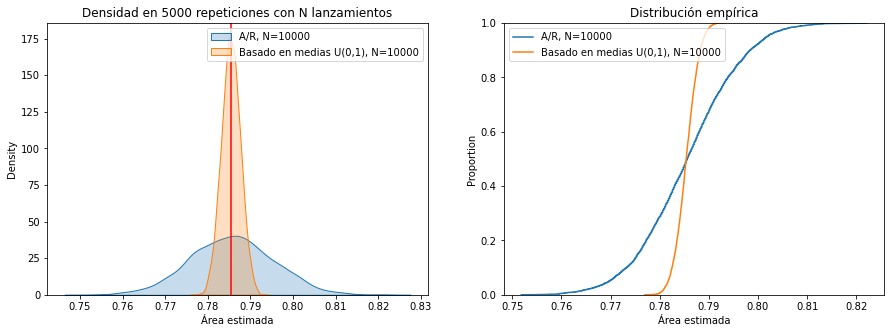

In [15]:
plot_kde_ecdf(res1, res2, ["A/R, N=10000", "Basado en medias U(0,1), N=10000"], np.pi/4)

Realizamos ahora varias repeticiones de la estimación basada en medias, aumentando paulatinamente el número de puntos desde 1 hasta 50000, proporcionando también un intervalo de confianza al 99.5% en cada caso. A la hora de dibujarlo comenzamos desde 50 puntos para visualizarlo mejor, ya que con pocos puntos la varianza es muy grande.

In [51]:
def mc_means_cummulative(h, x, alpha = 0.005, offset=0):
    y = h(x)
    
    # Establecemos la sucesión de puntos
    size = np.arange(start = 1, stop = len(x)+1, step = 1)

    # Calculamos la media de h progresivamente en todos los puntos 
    media = np.cumsum(y) / size

    # Calculamos el valor z_alpha para el intervalo de confianza
    z_alpha = norm.ppf(1-alpha/2)

    # Calculamos la varianza
    s2 = (y - media) * (y - media)
    s2[1:] = np.cumsum(s2)[1:]/size[0:-1]
    
    # Calculamos el intervalo de confianza
    ic = z_alpha*np.sqrt(s2)/np.sqrt(size)

    return media[offset:], ic[offset:]

In [52]:
def cum_sample_plot(f, n_samples, real_value = None, offset = 0, ax = None, print_ic = False):
    x = uniform.rvs(0,1, n_samples + offset)
    
    size=np.arange(start = offset+1, stop = len(x)+1, step = 1)
    
    if ax is None:
        fig, ax = plt.subplots()
    
    media, ic = mc_means_cummulative(f, x, alpha=0.005, offset=offset)
    sns.lineplot(x = np.arange(start = 1, stop = len(media)+1, step = 1), y = media, lw=.2, ax=ax)
    if real_value is not None:
        ax.plot([offset, len(x)], 2*[real_value], color='k', lw=.75)
    ax.set_xlabel("Sample size")
    ax.set_ylabel(r"Estimated integral value")
    ax.set_title(r"Importance sampling, $\mathcal{U}(0,1)$, $\alpha=0.005$")

    if print_ic:
        # Dibujamos los intervalos de confianza de forma continua
        ax.fill_between(size, media-ic, media+ic, color='r', alpha=.2)


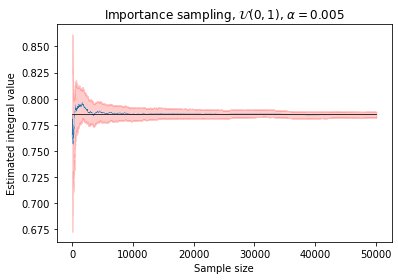

In [57]:
cum_sample_plot(h, 50000, np.pi/4, 50, print_ic = True)
plt.show()

Ahora realizamos 100 ejecuciones independientes del experimento desde 1 hasta 30000 puntos, y mostramos los resultados.

Calculando las 100 iteraciones del experimento: [====================] 100%

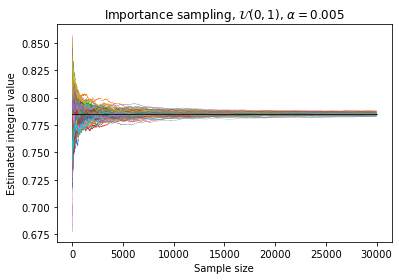

In [19]:
import sys

fig, ax = plt.subplots()
ax.set_title("100 independent simulations")
ax.set_xlabel("Sample size")
ax.set_ylabel(r"Estimated integral value, $\pi/4$")

for i in range(100):
    # Display waiting bar
    sys.stdout.write('\r')
    sys.stdout.write("Calculando las 100 iteraciones del experimento: [%-20s] %d%%" % ('='*((i+5)//5), i+1))
    sys.stdout.flush()
    
    cum_sample_plot(h, 30000, offset = 50, ax = ax, print_ic = False)

ax.plot([0, 30000], 2*[np.pi/4], color='k', lw=.75)
plt.show()

# Muestreo por importancia
## Ejercicio 3

Estimar la integral
$$
\int_0^1 \cos(50x)+\sin(20x)\, dx
$$

por Monte Carlo. Analice la convergencia de la estimación en función del tamaño de la muestra y proporcione un intervalo de confianza.

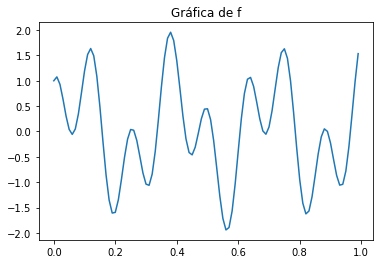

In [60]:
f=lambda x: np.cos(50*x)+np.sin(20*x)
x=np.arange(0, 1, 0.01)
plot_f(f,x)

Aplicamos el método de *importance sampling* como antes, proporcionando intervalos de confianza.

In [61]:
# Calculamos el área real
area=(1/50) *(5 * np.sin(10)**2 + np.sin(50))

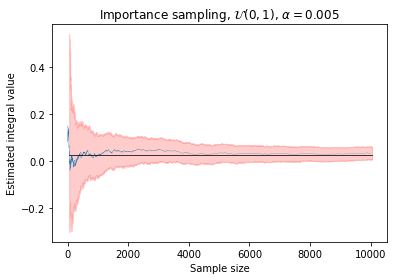

In [63]:
cum_sample_plot(f, 10000, area, 50, print_ic = True)
plt.show()

## Ejercicio 4

Estimar el valor de la integral
$$
\int_0^{10}e^{-2|x-5|}.
$$

Definimos una generalización del método de *importance sampling* donde se puede pasar cualquier función de densidad que se quiera utilizar como argumento a la función. 

In [66]:
def importance_sampling(f, x, density, samples=10000, alpha = 0.005, offset=0):    
    y = f(x)/[density(a) for a in x]
    
    # Establecemos la sucesión de puntos
    size = np.arange(start = 1, stop = samples+1, step = 1)

    # Calculamos la media de h progresivamente en todos los puntos 
    media = np.cumsum(y) / size

    # Calculamos el valor z_alpha para el intervalo de confianza
    z_alpha = norm.ppf(1-alpha/2)

    # Calculamos la varianza
    s2 = (y - media) * (y - media)
    s2[1:] = np.cumsum(s2)[1:]/size[0:-1]
    
    # Calculamos el intervalo de confianza
    ic = z_alpha*np.sqrt(s2)/np.sqrt(size)

    return media[offset:], ic[offset:]

Pintamos la función que buscamos integrar.

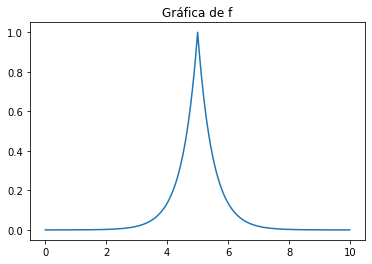

In [64]:
f = lambda x: np.exp(-2*np.abs(x - 5))
plot_f(f, np.arange(0, 10, 0.01))

Pintamos por un lado la función junto con las densidades que se van a utilizar en el método de integración, y por otro la convergencia que muestra el método con cada una de estas densidades.

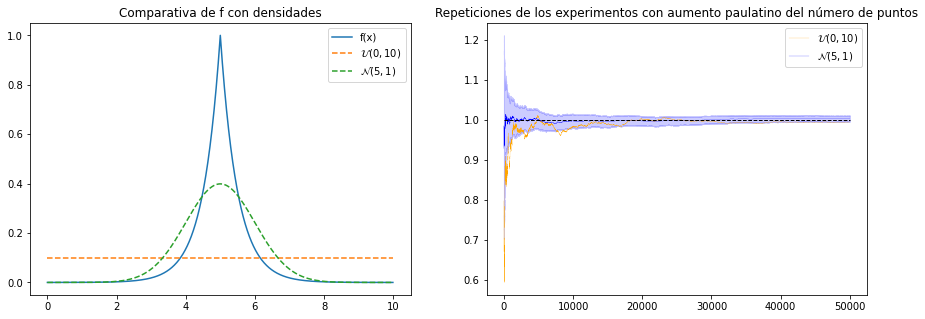

In [77]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

# Axes 0
x = np.arange(0, 10, 0.01)
axes[0].set_title("Comparativa de f con densidades")
axes[0].plot(x,f(x), label = "f(x)")
axes[0].plot([0,10], 2*[1/10], '--', label = r"$\mathcal{U}(0,10)$")
axes[0].plot(x, norm.pdf(x, 5, 1), '--', label=r'$\mathcal{N}(5,1)$')
axes[0].legend()

samples = 50000
offset = 50

# First experiment
media1, ic1 = importance_sampling(f, uniform.rvs(0, 10, samples+offset), density = lambda x: 1/10, 
                                  samples=samples + offset, alpha=0.005, offset=offset)
sns.lineplot(x = np.arange(start = 1, stop = samples+1, step = 1), y = media1, lw=.2, 
             color = 'orange', ax=axes[1], label = r'$\mathcal{U}(0, 10)$')

# Second experiment
media2, ic2 = importance_sampling(f, norm.rvs(5, 1, samples+offset), density = lambda x: norm.pdf(x,5,1), 
                                  samples=samples + offset, alpha=0.005, offset=offset)
sns.lineplot(x = np.arange(start = 1, stop = samples+1, step = 1), y = media2, lw=.2, 
             color = 'b', ax=axes[1], label = r'$\mathcal{N}(5,1)$')

axes[1].fill_between(np.arange(start = 1, stop = samples+1, step = 1), media2-ic2, 
                     media2+ic2, color='b', alpha=.2)
axes[1].plot([0, samples], 2*[1], '--', lw = 1, color = "black")
axes[1].set_title("Repeticiones de los experimentos con aumento paulatino del número de puntos")
plt.show()